In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [103]:
dataframe = pd.read_csv("iris.csv")
dataframe.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
dataframe.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Definimos la entrada

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [105]:
X = np.array(dataframe[["sepalLength","sepalWidth","petalLength", "petalWidth"]])
y = np.array(dataframe['class'])
X.shape

(150, 4)

Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.
## Obtener el valor K

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

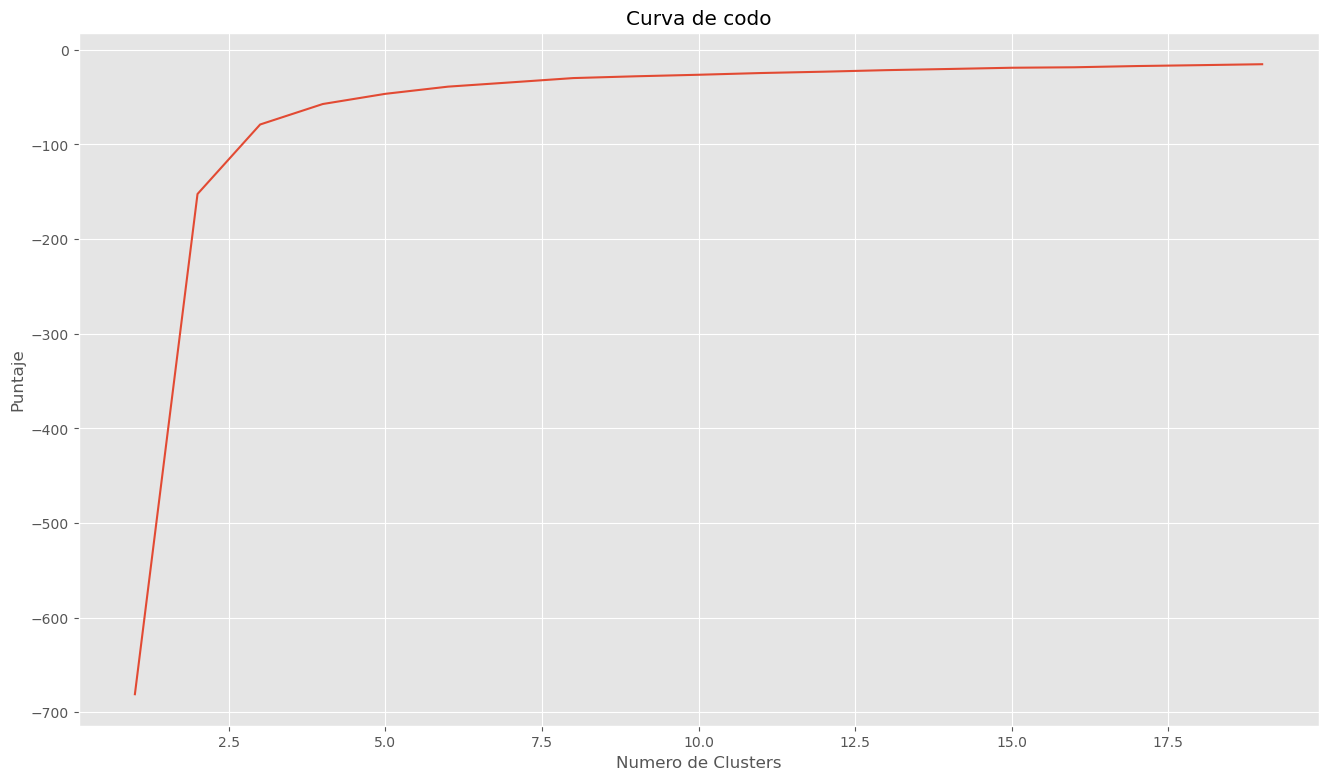

In [106]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva de codo')
plt.show()

Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.
## Ejecutamos K-Means

Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [109]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SyntaxError: invalid syntax (2177785933.py, line 1)

Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

In [110]:
import matplotlib.pyplot as plt
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

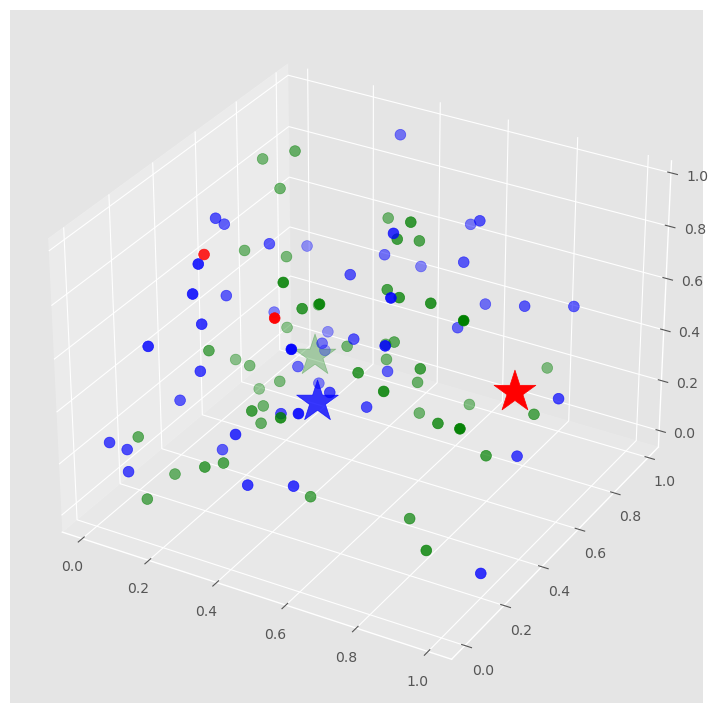

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que ya has ajustado el modelo K-means y tienes tus datos y centroides
# labels = kmeans.predict(X)
# C = kmeans.cluster_centers_

# Supongamos que tienes datos ficticios para propósitos de ejemplo
import numpy as np
X = np.random.rand(100, 3)  # Datos de ejemplo
C = np.random.rand(3, 3)  # Centroides de ejemplo

colores = ['red', 'green', 'blue']
asignar = [colores[row] for row in labels]

# Crear un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot de los datos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar[:100], s=60)  # Solo usar los primeros 100 elementos de asignar

# Scatter plot de los centroides
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()


Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

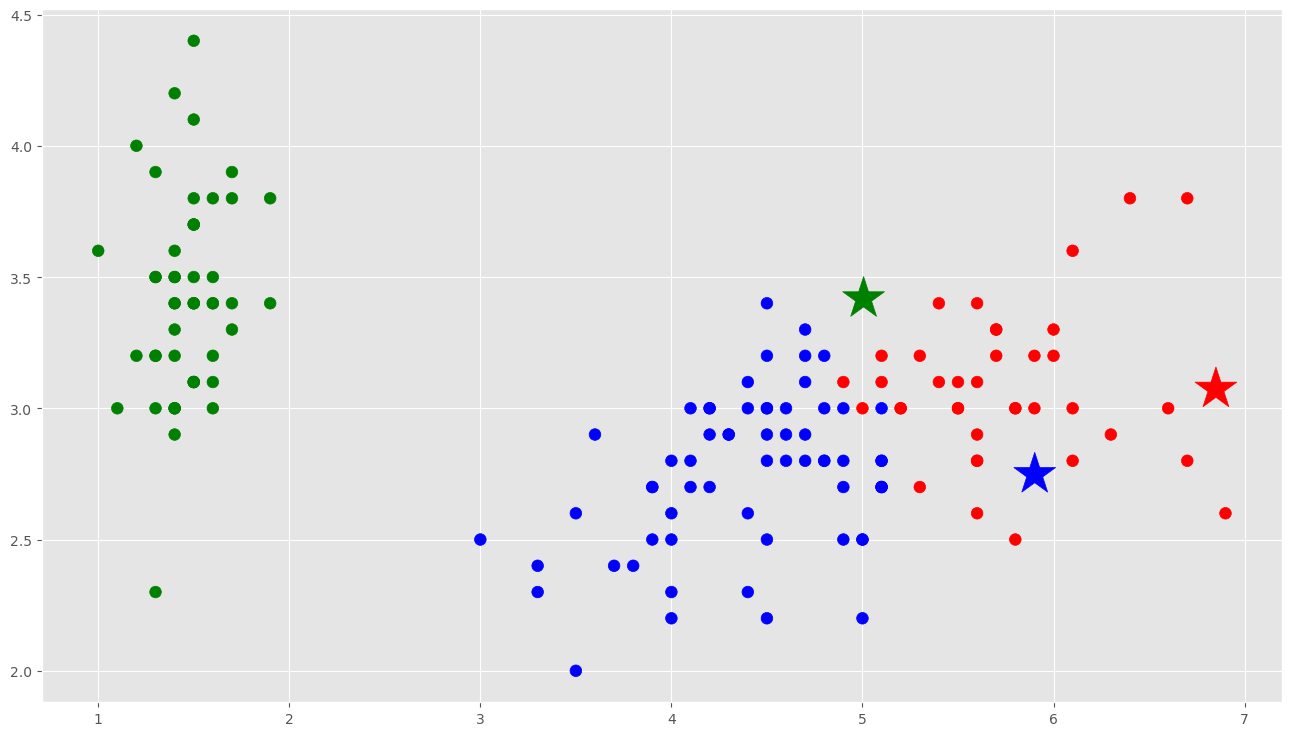

In [111]:
# Getting the values and plotting it
f1 = dataframe['petalLength'].values
f2 = dataframe['sepalWidth'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

En los centros vemos que tenemos una modelo, un político, presentadora de Tv, locutor de Radio y un deportista.
## Clasificar nuevas muestras

Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).

In [113]:
from collections import Counter

print(Counter(labels).keys())
print(Counter(labels).values())

dict_keys([1, 2, 0])
dict_values([50, 62, 38])


In [114]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)